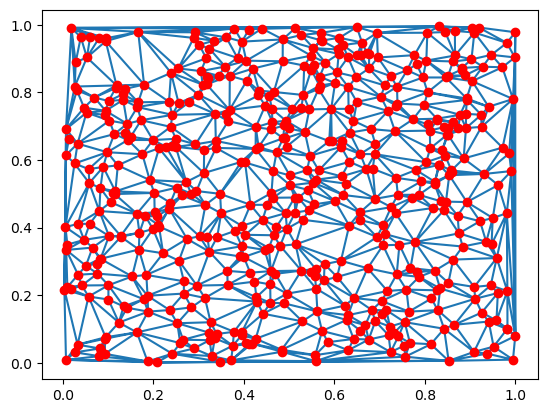

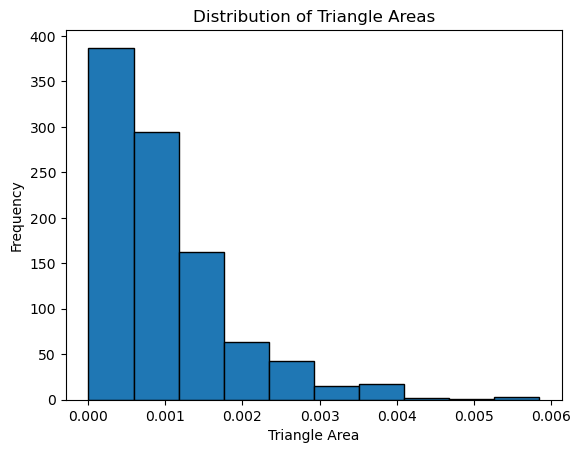

In [25]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Sample 2D dataset
points = np.random.rand(500, 2)

# Create Voronoi tessellation
triangulation = Delaunay(points)

# Plot the Delaunay triangulation
plt.triplot(points[:, 0], points[:, 1], triangulation.simplices)
plt.scatter(points[:, 0], points[:, 1], c='red', marker='o')
plt.show()

triangle_areas = []
for simplex in triangulation.simplices:
    triangle = points[simplex]
    triangle_area = 0.5 * np.abs(np.cross(triangle[1] - triangle[0], triangle[2] - triangle[0]))
    triangle_areas.append(triangle_area)

# Plot a histogram of triangle areas
plt.hist(triangle_areas, bins=10, edgecolor='black')
plt.xlabel('Triangle Area')
plt.ylabel('Frequency')
plt.title('Distribution of Triangle Areas')

plt.show()

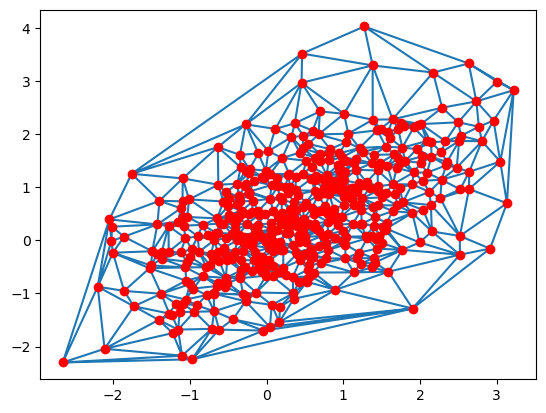

Text(0.5, 1.0, 'Distribution of Triangle Areas')

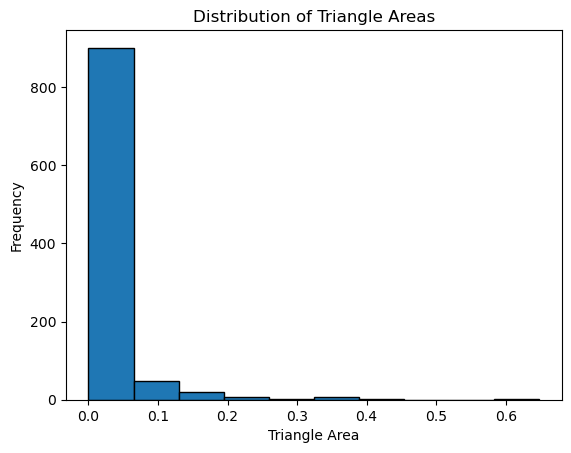

In [26]:
np.random.seed(40)

# Generate 2D points from a normal distribution
mean = [0.5, 0.5]
covariance_matrix = [[1, 0.5], [0.5, 1]]
num_points = 500
points = np.random.multivariate_normal(mean, covariance_matrix, num_points)

# Create Voronoi tessellation
triangulation = Delaunay(points)

# Plot the Delaunay triangulation
plt.triplot(points[:, 0], points[:, 1], triangulation.simplices)
plt.scatter(points[:, 0], points[:, 1], c='red', marker='o')
plt.show()

triangle_areas = []
for simplex in triangulation.simplices:
    triangle = points[simplex]
    triangle_area = 0.5 * np.abs(np.cross(triangle[1] - triangle[0], triangle[2] - triangle[0]))
    triangle_areas.append(triangle_area)

# Plot a histogram of triangle areas
plt.hist(triangle_areas, bins=10, edgecolor='black')
plt.xlabel('Triangle Area')
plt.ylabel('Frequency')
plt.title('Distribution of Triangle Areas')

In [39]:
import numpy as np
import pandas as pd
from glob import glob
import scripts.functions as fcts
from scipy.spatial import KDTree

#initialise paramaters for the detection/selection of synapses

params = {}
params['true_roi_size'] = (49660,49660,1100) #size of the 3d Tiff in microns
params['sf']  = (68, 68, 180) #defines the level of downsampling to create the filtered image
params['kernel_size'] = (40,40,2) #kernel size of the gaussian filter
params['sigma'] = 10 #intensity of the gaussian filter
params['max_threshold_ves'] = 4 #threshold for the extraction of intensity blobs in the image
params['min_peak_dist'] = 16 #min distance between 2 peaks (in pixels) - if distance is smaller, the 2 peaks are merged
params['min_cluster_area'] = 32 #min area of a cluster (in pixels)
params['max_cluster_area'] = 32000 #max area of a cluster (in pixels)

target_marker='PSD'
target_directory_drive = '/users/isabellegarnreiter/desktop/'

# Import all files (cell zones) under one experiment type, but for both dep and spon vesicle targets
# and store the data in dictionaries.

vesicles_data = {}
syn_marker_data = {}

target_directory = target_directory_drive
list_of_files = np.array([file for file in glob(target_directory + f'*/*{target_marker}*/*/*emix/*w*.csv')])

try:
    list_of_files = list_of_files.reshape(list_of_files.shape[0]//2,2)
except ValueError:
    print('Value Error: one channel is missing from one of the cellzones.')

    
# usable_exp = pd.read_csv('/users/isabellegarnreiter/documents/vesicleSTORM/data/STORM_binary_list.csv',encoding='latin', sep=',').to_numpy()
# filename  = usable_exp[:,0]+'_'+usable_exp[:,1]
# files_infos = dict(zip(filename, usable_exp[:,2:]))
vesicles_path = r'/Users/isabellegarnreiter/Desktop/PSD/210208 DEP647_PSD680 8DIV/CellZone2/Demix/CoordTable_SAFE360_MULTIPLEXING_demixed_w2_UncertaintyFiltered.csv'
PSD_path = r'/Users/isabellegarnreiter/Desktop/PSD/210208 DEP647_PSD680 8DIV/CellZone2/Demix/CoordTable_SAFE360_MULTIPLEXING_demixed_w1_UncertaintyFiltered.csv'

vesicles = pd.read_csv(vesicles_path)[['x [nm]', 'y [nm]', 'z [nm]']].to_numpy(dtype=np.float64)
vesicles[:,2] +=550

PSD = pd.read_csv(PSD_path)[['x [nm]', 'y [nm]', 'z [nm]']].to_numpy(dtype=np.float64)
PSD[:,2] +=550

vesicles_data = vesicles
syn_marker_data = PSD

image_size = (params['true_roi_size'][0]//params['sf'][0], params['true_roi_size'][1]//params['sf'][1], params['true_roi_size'][2]//params['sf'][2])
wfi = fcts.get_gaussiankde(vesicles_data, params)

masks_647 = fcts.get_clusters(wfi, params)
cluster_points_647 = fcts.get_points(vesicles_data, masks_647, params)
seperated_clusters_647 = fcts.seperate_clusters(masks_647)



In [45]:
len(cluster_points_647)



22

In [44]:
import os
points_647_file = r'/Users/isabellegarnreiter/Desktop/PSD/210208 DEP647_PSD680 8DIV/CellZone2/Demix/data/points_647.npy'
points_647 = np.load(points_647_file, allow_pickle=True)[()]
len(points_647)


22